In [1]:
import torch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

RANDOM_STATE = 42

In [2]:
file_dir = 'вино.txt'

data = pd.read_csv(file_dir, 
                   sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
X_train_ts = torch.FloatTensor(data.values)
X_train_ts

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  0.4500,  8.8000,  6.0000],
        [ 6.3000,  0.3000,  0.3400,  ...,  0.4900,  9.5000,  6.0000],
        [ 8.1000,  0.2800,  0.4000,  ...,  0.4400, 10.1000,  6.0000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  0.4600,  9.4000,  6.0000],
        [ 5.5000,  0.2900,  0.3000,  ...,  0.3800, 12.8000,  7.0000],
        [ 6.0000,  0.2100,  0.3800,  ...,  0.3200, 11.8000,  6.0000]])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,6.9,0.3,0.3,6.4,0.0,35.3,138.4,1.0,3.2,0.5,10.5,5.9
std,0.8,0.1,0.1,5.1,0.0,17.0,42.5,0.0,0.2,0.1,1.2,0.9
min,3.8,0.1,0.0,0.6,0.0,2.0,9.0,1.0,2.7,0.2,8.0,3.0
25%,6.3,0.2,0.3,1.7,0.0,23.0,108.0,1.0,3.1,0.4,9.5,5.0
50%,6.8,0.3,0.3,5.2,0.0,34.0,134.0,1.0,3.2,0.5,10.4,6.0
75%,7.3,0.3,0.4,9.9,0.0,46.0,167.0,1.0,3.3,0.6,11.4,6.0
max,14.2,1.1,1.7,65.8,0.3,289.0,440.0,1.0,3.8,1.1,14.2,9.0


In [6]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [7]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
data['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = data['quality']
X = data.drop('quality', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_STATE,
                                                    shuffle = True,
                                                    stratify = y) 

scaler = MinMaxScaler(feature_range = (0,1))


X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


X_train = torch.tensor(X_train, device = 'cuda')
X_test = torch.tensor(X_test, device = 'cuda')
y_train = torch.tensor(y_train.to_numpy(), dtype = torch.float32, device = 'cuda')
y_test = torch.tensor(y_test.to_numpy(), dtype = torch.float32, device = 'cuda')

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)


train_loader = DataLoader(train_dataset, batch_size = 50, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 50)


input_size = len(data.columns[:-1])
output_size = 1



model = nn.Sequential(
    nn.Linear(11,13),
    nn.Tanh(),
    nn.Linear(13,1)
)

model

Sequential(
  (0): Linear(in_features=11, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device used : {device}")

Device used : cuda:0


In [ ]:
def training_loop(epoches,
                  model,
                  X_train,
                  y_train,
                  X_test,
                  y_test,
                  loss_fn,
                  optimizer):
    
    train_losses =[]
    val_losses = []
    RMSE_on_train_all = []
    RMSE_on_test_all = []

    model = model.to(device)

    X_train = X_train.to(dtype = torch.float32)
    X_test = X_test.to(dtype = torch.float32)   
    
    for epoch in range(1, epoches+1):
        predict = model(X_train)
        train_loss = loss_fn(predict, y_train)
        train_losses.append(train_loss.item())
        RMSE_train = torch.sqrt(train_loss)
        RMSE_on_train_all.append(RMSE_train.item())

        val_predict = model(X_test)
        val_loss = loss_fn(val_predict, y_test)
        val_losses.append(val_loss.item())
        RMSE_val = torch.sqrt(val_loss)
        RMSE_on_test_all.append(RMSE_val.item())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        torch.cuda.empty_cache()
        if epoch <= 5 or epoch % 500 == 0:
            print('Epoch: ', epoch, ' Train loss: ', train_loss.item(), ' Train RMSE: ', RMSE_train.item() ,
                                    ' Val loss: ', val_loss.item(), ' Val RMSE: ', RMSE_val.item())

    return train_losses, val_losses, RMSE_on_train_all, RMSE_on_test_all
        

In [ ]:
train_loss_spisok, val_loss_spisok, RMSE_train_spisok, RMSE_test_spisok =\
training_loop(
    epoches = 10000,
    model = model,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test,
    loss_fn = torch.nn.MSELoss(),
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
)


c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([3918])) that is different to the input size (torch.Size([3918, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([980])) that is different to the input size (torch.Size([980, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  1  Train loss:  32.9498405456543  Train RMSE:  5.740195274353027  Val loss:  33.74728012084961  Val RMSE:  5.809240818023682
Epoch:  2  Train loss:  32.65819549560547  Train RMSE:  5.71473503112793  Val loss:  33.464637756347656  Val RMSE:  5.784862995147705
Epoch:  3  Train loss:  32.367584228515625  Train RMSE:  5.68925142288208  Val loss:  33.18294906616211  Val RMSE:  5.760464191436768
Epoch:  4  Train loss:  32.07792663574219  Train RMSE:  5.663737773895264  Val loss:  32.902137756347656  Val RMSE:  5.736038684844971
Epoch:  5  Train loss:  31.789146423339844  Train RMSE:  5.638186454772949  Val loss:  32.622127532958984  Val RMSE:  5.711578369140625
Epoch:  500  Train loss:  0.8231735229492188  Train RMSE:  0.9072890877723694  Val loss:  0.8642727136611938  Val RMSE:  0.9296627044677734
Epoch:  1000  Train loss:  0.8210611343383789  Train RMSE:  0.9061242341995239  Val loss:  0.8572220206260681  Val RMSE:  0.9258628487586975
Epoch:  1500  Train loss:  0.819216251373291  T

c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

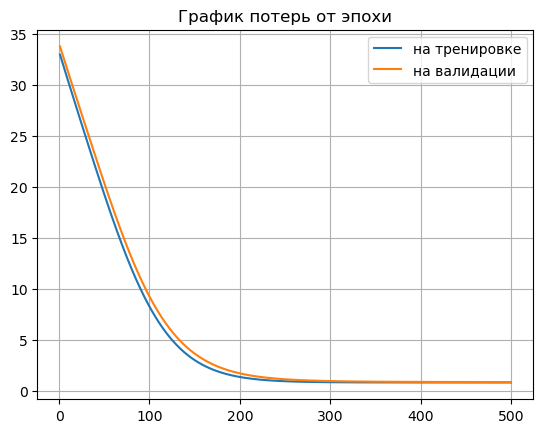

In [ ]:
sns.lineplot(x = [i for i in range(1, 10000 + 1)][:500],
             y = train_loss_spisok[:500],
             label = 'на тренировке')
sns.lineplot(x = [i for i in range(1, 10000 + 1)][:500],
             y = val_loss_spisok[:500],
             label = 'на валидации')
plt.title('График потерь от эпохи')
plt.xlabel('эпоха')
plt.ylabel('mse')
plt.legend()
plt.grid()

c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

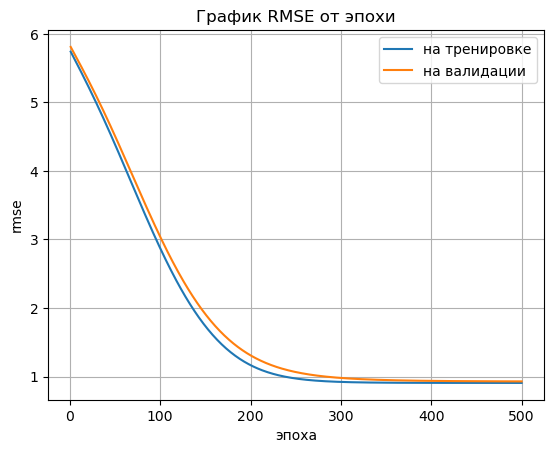

In [ ]:
sns.lineplot(x = [i for i in range(1, 10000 + 1)][:500],
             y = RMSE_train_spisok[:500],
             label = 'на тренировке')
sns.lineplot(x = [i for i in range(1, 10000 + 1)][:500],
             y = RMSE_test_spisok[:500],
             label = 'на валидации')
plt.title('График RMSE от эпохи')
plt.xlabel('эпоха')
plt.ylabel('rmse')
plt.legend()
plt.grid()

In [ ]:
X_test = X_test.to(dtype = torch.float32)

In [ ]:
predict = pd.Series(model(X_test).cpu().data.numpy().flatten())
true = pd.Series(y_test.cpu().numpy())

itog = pd.concat([true, predict], axis = 1)
itog.columns = ['true', 'predict']

In [ ]:
itog.describe().round(2)

,true,predict
count,980.00,980.00
mean,5.90,5.86
std,0.88,0.14
min,3.00,5.35
25%,5.00,5.77
50%,6.00,5.86
75%,6.00,5.95
max,8.00,6.34


In [ ]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

# Пробуем применить модель классификации

In [ ]:
import torch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score
from skorch import NeuralNetClassifier

RANDOM_STATE = 42


file_dir = 'вино.txt'

data = pd.read_csv(file_dir, 
                   sep = ';')



target = torch.LongTensor(data['quality'])
target_onehot = torch.zeros(data.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)



from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# y = data['quality']
X = data.drop('quality', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, target_onehot,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_STATE,
                                                    shuffle = True,
                                                    stratify = target_onehot) 

scaler = MinMaxScaler(feature_range = (0,1))


X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


X_train = torch.tensor(X_train, device = 'cuda')
X_test = torch.tensor(X_test, device = 'cuda')
# y_train = torch.tensor(y_train.to_numpy(), dtype = torch.float32, device = 'cuda')
# y_test = torch.tensor(y_test.to_numpy(), dtype = torch.float32, device = 'cuda')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device used : {device}")

Device used : cuda:0


# Модель классификации

In [ ]:
# clf_model =\
#     nn.Sequential(
     
#             nn.Linear(11,128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64,32),
#             nn.ReLU(),
#             nn.Linear(32,10)
# )

clf_model =\
    nn.Sequential(
     
            nn.Linear(11,16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32,10)
)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(clf_model.parameters(), lr = 0.001)


def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred))
    return acc

clf_model

Sequential(
  (0): Linear(in_features=11, out_features=16, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=16, out_features=32, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
def accuracy_onehot(y_pred,
                    y_train):
    soft_function = nn.Softmax(dim = 1)
    y_pred = torch.max(input = soft_function(y_pred), dim = 1)[1].to(device).view(-1,1)
    y_train = torch.argmax(y_train, dim = 1).to(device).view(-1,1)

    correct_predict = torch.sum((y_train == y_pred))
    acc = correct_predict / len(y_train)
    return acc



def training_loop_clf(
                  epoches,
                  model,
                  X_train,
                  y_train,
                  X_test,
                  y_test,
                  loss_fn,
                  optimizer):
    
    train_losses =[]
    val_losses = []
    train_accuracy = []
    val_accuracy = []

    model = model.to(device)

    X_train = X_train.to(dtype = torch.float32)
    X_test = X_test.to(dtype = torch.float32)
    # y_train = torch.LongTensor(y_train.cpu().numpy()).cuda()
    # y_test = torch.LongTensor(y_test.cpu().numpy()).cuda()
    y_train = y_train.to(device)
    y_test = y_test.to(device)
    
    for epoch in range(1, epoches+1):

        model.train()

        predict = model(X_train)
        train_loss = loss_fn(predict, y_train)
        train_losses.append(train_loss.item())
        # train_acc = accuracy(y_train, predict)
        # train_accuracy.append(train_acc.item())
        # train_acc = accuracy_score(predict.cpu(), y_train)
        # train_accuracy.append(train_acc)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()


        model.eval()

        with torch.no_grad():
            train_acc = accuracy_onehot(predict, y_train).item()
            train_accuracy.append(train_acc)

            val_predict = model(X_test)
            val_loss = loss_fn(val_predict, y_test)
            val_losses.append(val_loss.item())

            val_acc = accuracy_onehot(val_predict, y_test).item()
            val_accuracy.append(val_acc)


        if epoch <= 5 or epoch % 500 == 0:
            print('Epoch: {:3d} / {},  Train loss: {:.4f}, Train accuracy: {:.2f}, Val loss: {:.4f}, Val accuracy: {:.2f}'\
                  .format(
                  epoch, epoches, train_loss.item(), train_acc, val_loss.item(), val_acc
                  ))
        
    sns.lineplot(x = [i for i in range(1, epoches+1)],
             y = train_losses,
             label = 'на тренировке')
    sns.lineplot(x = [i for i in range(1, epoches+1)],
                y = val_losses,
                label = 'на валидации')
    plt.title('График потерь от эпохи')
    plt.xlabel('эпоха')
    plt.ylabel('loss')
    plt.legend()
    plt.grid()
    plt.show()

    sns.lineplot(x = [i for i in range(1, epoches+1)],
             y = train_accuracy,
             label = 'на тренировке')
    sns.lineplot(x = [i for i in range(1, epoches+1)],
                y = val_accuracy,
                label = 'на валидации')
    plt.title('График accuracy от эпохи')
    plt.xlabel('эпоха')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid()

    return train_losses, val_losses, train_accuracy, val_accuracy

Epoch:   1 / 5000,  Train loss: 0.6729, Train accuracy: 0.30, Val loss: 0.6708, Val accuracy: 0.45
Epoch:   2 / 5000,  Train loss: 0.6713, Train accuracy: 0.30, Val loss: 0.6689, Val accuracy: 0.45
Epoch:   3 / 5000,  Train loss: 0.6694, Train accuracy: 0.30, Val loss: 0.6670, Val accuracy: 0.45
Epoch:   4 / 5000,  Train loss: 0.6674, Train accuracy: 0.29, Val loss: 0.6652, Val accuracy: 0.45
Epoch:   5 / 5000,  Train loss: 0.6659, Train accuracy: 0.28, Val loss: 0.6633, Val accuracy: 0.45
Epoch: 500 / 5000,  Train loss: 0.2049, Train accuracy: 0.47, Val loss: 0.1988, Val accuracy: 0.47
Epoch: 1000 / 5000,  Train loss: 0.1970, Train accuracy: 0.50, Val loss: 0.1927, Val accuracy: 0.52
Epoch: 1500 / 5000,  Train loss: 0.1939, Train accuracy: 0.51, Val loss: 0.1906, Val accuracy: 0.53
Epoch: 2000 / 5000,  Train loss: 0.1923, Train accuracy: 0.51, Val loss: 0.1901, Val accuracy: 0.53
Epoch: 2500 / 5000,  Train loss: 0.1908, Train accuracy: 0.52, Val loss: 0.1903, Val accuracy: 0.53
Epoch:

c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

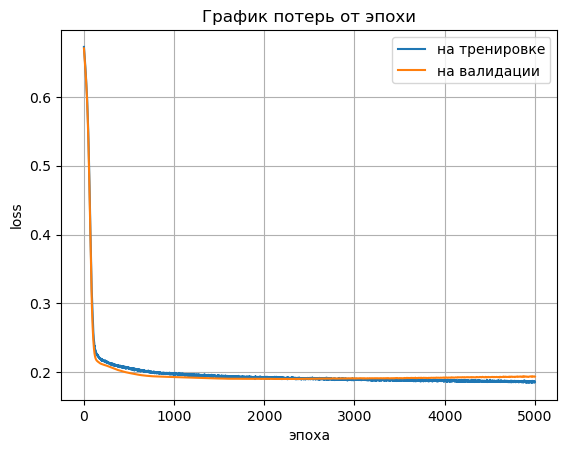

c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oudel\anaconda3\envs\newenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

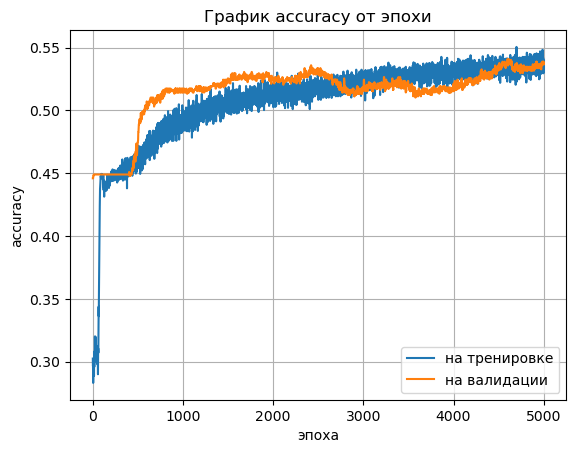

In [ ]:
train_loss, val_loss, train_accuracy, val_accuracy =\
training_loop_clf(
    epoches = 5000,
    model = clf_model,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test,
    loss_fn = loss_fn,
    optimizer = optimizer
)

In [13]:
X_train.shape

(3918, 11)

In [16]:
import scipy


X_train =  scipy.sparse.csr_matrix(X_train)
X_test = scipy.sparse.csr_matrix(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_ = LogisticRegression()
model_.fit(X_train, y_train)

y_pred = model_.predict(X_test)

accuracy_score(y_pred = y_pred,
               y_true = y_test)


c:\Users\oudel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5316326530612245